# Shot Type for Ads

## Exploratory Data Analysis


In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import json

import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [2]:
# reading the JSON data using json.load()
file = '/workspaces/final-project-shot-type/data/shot-type-dataset/v1_split_trailer.json'
with open(file) as train_file:
    dict= json.load(train_file)


Creating a Datafrtame with the JSON file

In [3]:
# Creating a DataFrame with the JSON data

dataset = []
movie = []
shot= []
scale_label = []
scale_val = []
mov_label = []
mov_val = []

# We pass for all JSON keys an append every trailer labels different lists
for key_type_ds in dict:
    for key_movie in dict[key_type_ds]:
        for key_shot in dict[key_type_ds][key_movie]:

            dataset.append(key_type_ds)
            movie.append(key_movie)
            shot.append(key_shot)
            scale_label.append(dict[key_type_ds][key_movie][key_shot]['scale']['label'])
            scale_val.append(dict[key_type_ds][key_movie][key_shot]['scale']['value'])
            mov_label.append(dict[key_type_ds][key_movie][key_shot]['movement']['label'])
            mov_val.append(dict[key_type_ds][key_movie][key_shot]['movement']['value'])

# We build the dataframe with the lists data
data = list(zip(dataset, movie, shot, scale_label, scale_val, mov_label, mov_val))  
columns = ['dataset','movie', 'shot', 'scale_label', 'scale_val', 'move_label', 'move_val']  
        
df = pd.DataFrame(data, columns=columns)

In [4]:
df

,dataset,movie,shot,scale_label,scale_val,move_label,move_val
0,train,tt0444850,0014,CS,1,Static,4
1,train,tt0444850,0015,CS,1,Static,4
2,train,tt0444850,0016,ECS,0,Static,4
3,train,tt2005173,0002,MS,2,Static,4
4,train,tt2005173,0014,CS,1,Static,4
...,...,...,...,...,...,...,...
33648,test,tt6644200,0011,FS,3,Static,4
33649,test,tt6644200,0015,MS,2,Motion,0
33650,test,tt6644200,0021,FS,3,Motion,0
33651,test,tt6644200,0026,LS,4,Static,4


#### Number of movies

In [5]:
movies_num = df['movie'].unique().shape[0]
movies_num

7848

#### Number of shots

In [6]:
shots_num = df['shot'].shape[0]
shots_num

33653

#### Type of shots

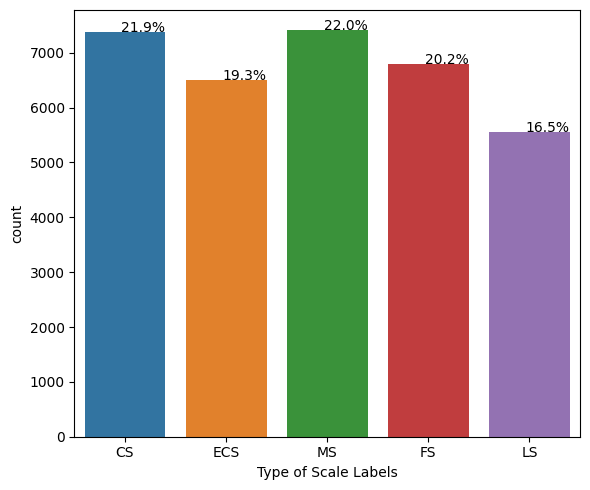

In [7]:
# Plotting the Scale Labels with percentages
fig, axes = plt.subplots(figsize=(6,5))
ax=sns.countplot(x= df['scale_label'].values)
ax.set(xlabel='Type of Scale Labels')

#calculating percentage of each label
total = float(len(df['scale_label']))
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')


fig.tight_layout()
plt.show()

#### Type of Movements

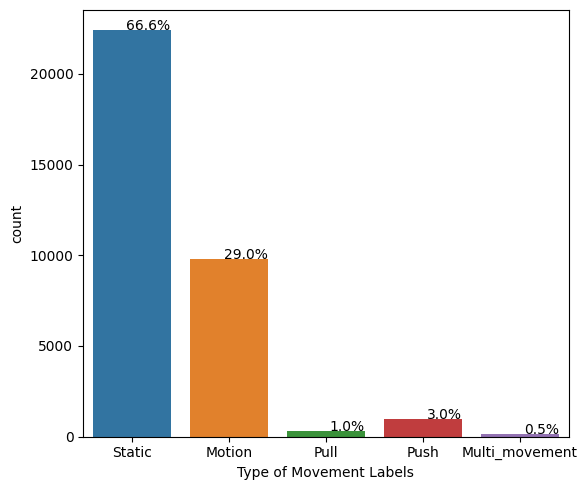

In [8]:
# Plotting the Movement labels with percentages
fig, axes = plt.subplots(figsize=(6,5))
ax=sns.countplot(x= df['move_label'].values)
ax.set(xlabel='Type of Movement Labels')

#calculating percentage of each label
total = float(len(df['move_label']))
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')


fig.tight_layout()
plt.show()

#### Appending to the DataFrame: Number of FPS, Total Frames and trailer duration 

In [10]:
# Using CV framework to see the trailers format

# fps_list = []
# frames_list = []
# duration_list = []
# width_list = []
# height_list = []
# chn_list = []

# # passing trough the dataset dataFrame (df) and getting fps and total_frames
# for idx in df.index.values:
#     movie = df['movie'].iloc[idx]
#     shot = df['shot'].iloc[idx]
    
#     # We use VideoCapture to obtain trailer's characteristics
#     video = cv2.VideoCapture('/workspaces/final-project-shot-type/data/shot-type-dataset/trailer/'+ movie +'/shot_' + str(shot) + '.mp4')
    
#     # Total Frames, FPS and duration of the trailer
#     total_frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
#     fps = round (video.get(cv2.CAP_PROP_FPS),0)
#     frames_list.append(total_frames)
#     fps_list.append(fps)
#     duration_list.append(round (total_frames / fps,1))

#     # Getting size of the frames
#     frame_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
#     frame_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
#     frame_chnls = video.get(cv2.CAP_PROP_CHANNEL)
#     width_list.append(frame_width)
#     height_list.append(frame_height)

#     #Getting number of channels per movie
#     # Using the first frame
#     frame_id = 0
#     video.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
#     ret, frame = video.read()
#     chn_list.append(frame.shape[2])

#     print(f'movie {idx} / {len(df.index.values)} done')

# # Loading new data into Dataframe
# df['total_frames'] = frames_list
# df['fps'] = fps_list
# df ['trailer_duration'] = duration_list
# df['frame_height'] = height_list
# df['frame_width'] = width_list
# df['frame_channels'] = chn_list


In [11]:
df = pd. read_csv('/workspaces/final-project-shot-type/data/CSV/dataset_df.csv')

In [12]:
df

,Unnamed: 0,dataset,movie,shot,scale_label,scale_val,move_label,move_val,total_frames,fps,trailer_duration,frame_height,frame_width,frame_channels
0,0,train,tt0444850,14,CS,1,Static,4,53.0,24.0,2.2,1080.0,1920.0,3
1,1,train,tt0444850,15,CS,1,Static,4,45.0,24.0,1.9,1080.0,1920.0,3
2,2,train,tt0444850,16,ECS,0,Static,4,24.0,24.0,1.0,1080.0,1920.0,3
3,3,train,tt2005173,2,MS,2,Static,4,22.0,25.0,0.9,1080.0,1920.0,3
4,4,train,tt2005173,14,CS,1,Static,4,22.0,25.0,0.9,1080.0,1920.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33648,33648,test,tt6644200,11,FS,3,Static,4,26.0,24.0,1.1,1080.0,1920.0,3
33649,33649,test,tt6644200,15,MS,2,Motion,0,38.0,24.0,1.6,1080.0,1920.0,3
33650,33650,test,tt6644200,21,FS,3,Motion,0,47.0,24.0,2.0,1080.0,1920.0,3
33651,33651,test,tt6644200,26,LS,4,Static,4,28.0,24.0,1.2,1080.0,1920.0,3


In [13]:
#df.to_csv('/workspaces/final-project-shot-type/data/CSV/dataset_df.csv')

#### We check if all the trailers have more or equal than 8 fps

In [14]:
df[ df['fps'] < 8 ].shape[0]

0

#### Yes, all the trailes have at least 8 frames

#### Plotting Channels, FPS, total frames and duration of the trailers

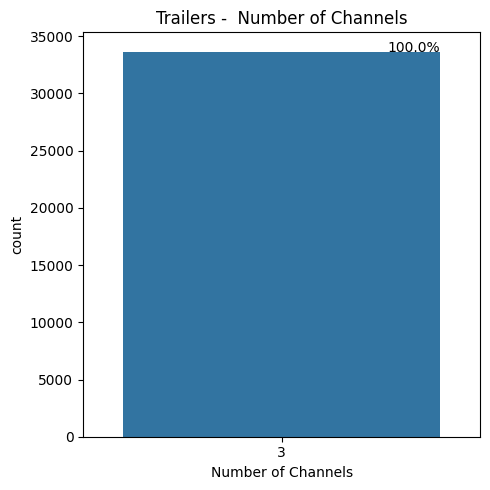

In [15]:
# PLotting number of Channels for every shot

fig, axes = plt.subplots(figsize=(5,5))
ax=sns.countplot(x= df['frame_channels'].values)
ax.set(xlabel='Number of Channels')
ax.set(title='Trailers -  Number of Channels' )

#calculating percentage of each label
total = float(len(df['frame_channels']))
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')


fig.tight_layout()
plt.show()

We can see that the complete dataset has 3 channels on every movie.

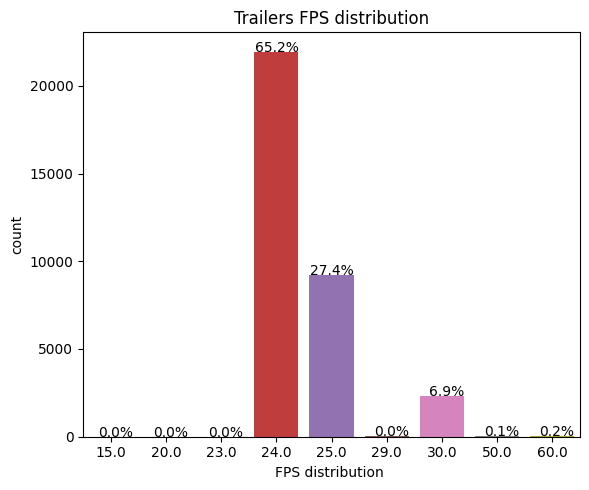

In [16]:
# Plotting the FPS distribution

fig, axes = plt.subplots(figsize=(6,5))
ax=sns.countplot(x= df['fps'].values)
ax.set(xlabel='FPS distribution ')
ax.set(title='Trailers FPS distribution' )

#calculating percentage of each label
total = float(len(df['fps']))
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')


fig.tight_layout()
plt.show()

We can see that almost the whole dataset has 24 or 25 FPS.

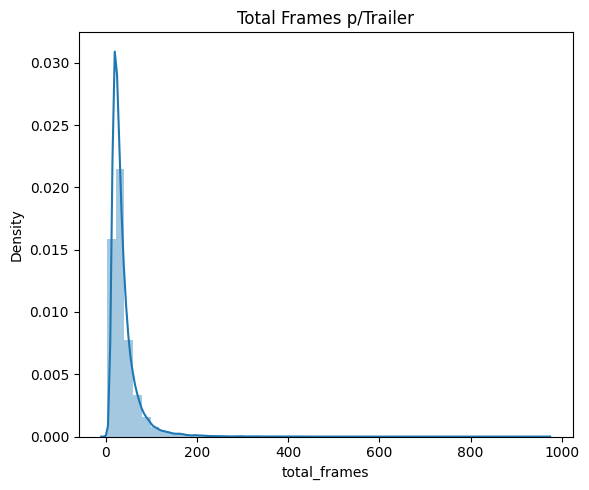

In [17]:
# Plotting the Total number of Frames per Trailer
fig, axes = plt.subplots(figsize=(6,5))
sns.distplot(df['total_frames'], kde=True)
axes.set(title='Total Frames p/Trailer' )
fig.tight_layout()

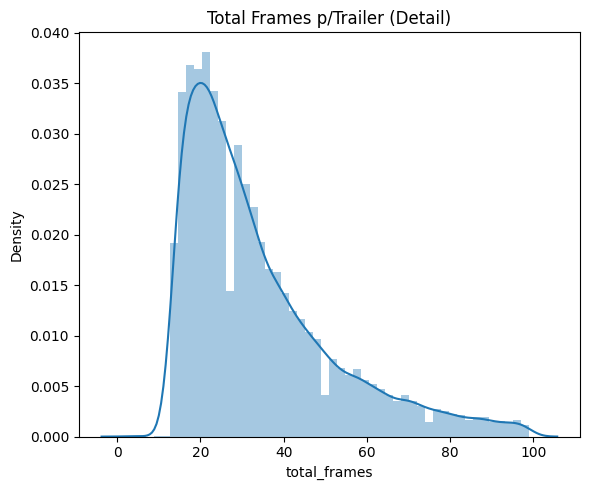

In [18]:
# Plotting the Total number of Frames per Trailer (zoom)
fig, axes = plt.subplots(figsize=(6,5))
sns.distplot(df['total_frames'][df['total_frames']< 100], kde=True)
axes.set(title='Total Frames p/Trailer (Detail)' )
fig.tight_layout()

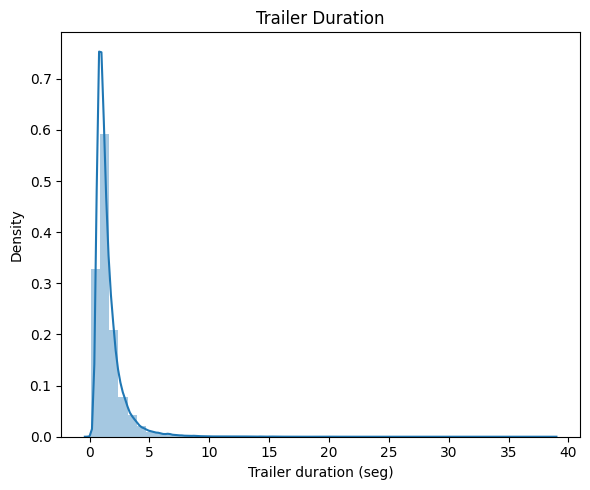

In [19]:
# Plotting the Trailers duration
fig, axes = plt.subplots(figsize=(6,5))
sns.distplot(df['trailer_duration'], kde=True)
axes.set(title='Trailer Duration' )
axes.set(xlabel='Trailer duration (seg)')
fig.tight_layout()

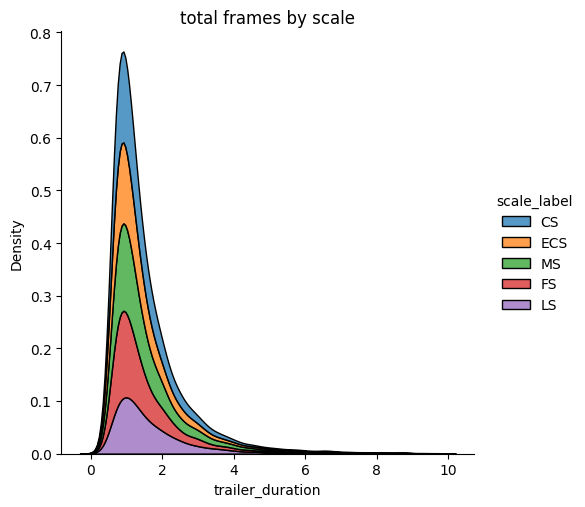

In [24]:
# Plotting the duration of shots in second, classified by scale
sns.displot(data=df, x= df['trailer_duration'][df['trailer_duration'] < 10], hue='scale_label', multiple='stack',  kind='kde', fill=True)
plt.title('total frames by scale')
plt.show()

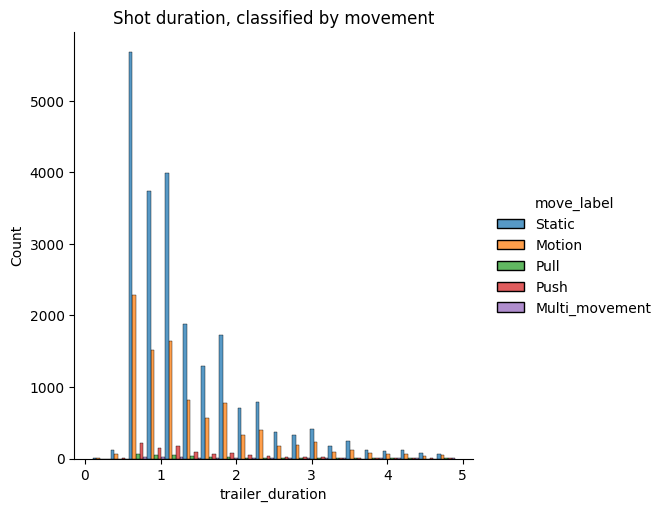

In [28]:
# Plotting the duration of shots in second, classified by movement
sns.displot(data=df, x = df['trailer_duration'][df['trailer_duration'] < 5], hue='move_label', multiple='dodge', bins=20)
plt.title('Shot duration, classified by movement')
plt.show()

#### Exploring the size of the frames

<AxesSubplot: xlabel='frame_height', ylabel='frame_width'>

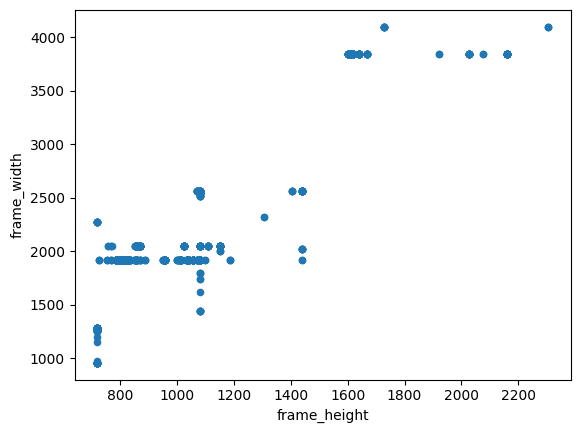

In [21]:
# Plotting frame's height vs width 
df.plot.scatter(x='frame_height', y='frame_width')

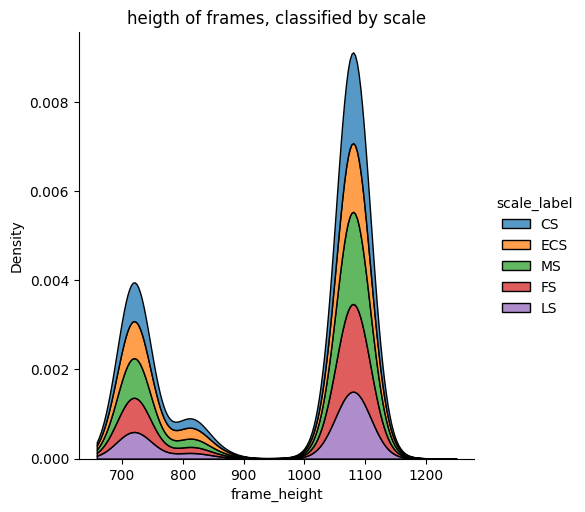

In [29]:
# Plotting height of shot frames, classified by scale
# Note, excluding some high-quality shots
sns.displot(data=df, x= df['frame_height'][df['frame_height']< 1250], hue='scale_label', multiple='stack',  kind='kde', fill=True)
plt.title('heigth of frames, classified by scale')
plt.show()

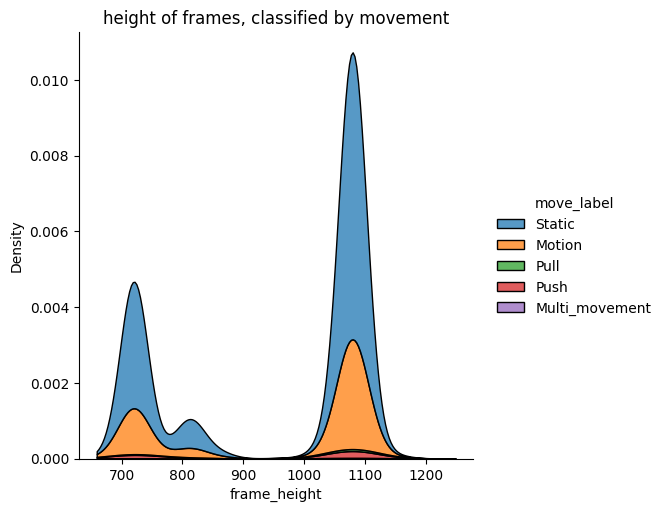

In [30]:
# Plotting height of shot frames, classified by scale
# Note, excluding some high-quality shots
sns.displot(data=df, x= df['frame_height'][df['frame_height'] < 1250], hue='move_label', multiple='stack',  kind='kde', fill=True)
plt.title('height of frames, classified by movement')
plt.show()

#### Exploring correlations between features

In [31]:
# Create a cross table with proportions for each movement class
cross_table_movement = pd.crosstab(df['move_label'],df['scale_label'], normalize='index')

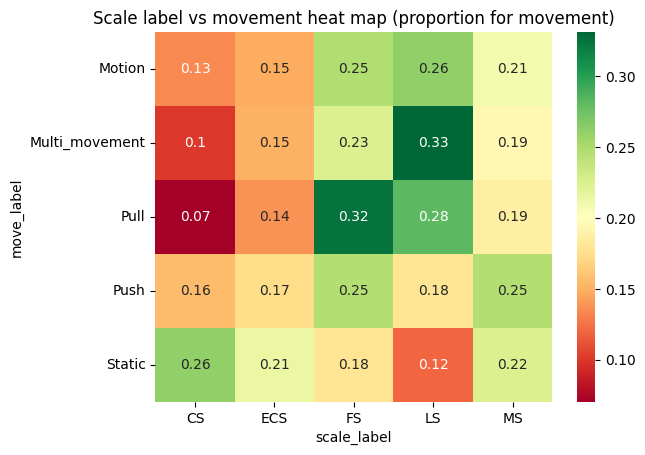

In [32]:
# Generate a heat map to better visualize the distributions
sns.heatmap(cross_table_movement, annot=True, cmap='RdYlGn')
plt.title('Scale label vs movement heat map (proportion for movement)')
plt.show()

#### Conclussions about the EDA

1. Dataset has 7848 trailers (movies) and 33653 shots

2. Referring to the Type of Shots:

   CS : 21.9 %

   ECS: 19.3 %

   MS:  22   %

   FS:  20.2 %

   LS:  16.5 %

   We can say we have a balanced dataset for this topic.

3. Referring to Type of Movement:

   Static:  66.6 %

   Motion:  29   %

   Pull:     1   %

   Push:     3   %
        
   Multi_m:  0.5 %

   We have several unbalanced dataset for Movements.

4. About the number of channels, FPS, Total Frames, and duration of each movie

   4.1 -   All movies have an equal number or more than 8 frames.

   4.2 -   93 % of the movies have 24 or 25 fps

   4.3 -   The majority of the movies have between 8 and 100 frames

   4.4 -   Movies' Duration is between 1 and 5 seconds 

   4.5 -   All videos and shots have 3 channels.

   4.6 -   Distribution of total trailer frames are right-skewed (positive skewness) shape

   4.7 -   In reference to the size of the frames, we appreciate two zones: one that we call "low quality", 
           which is inside 1500x2500 pixels, and another that we call "high quality" which is around height between 1600-2500 and width of around 3800 pixels

5. About the correlations between features:

    5.1 -  We can see a strong correlation between Pull (zoom-out camera movement) and FS (Full Shot) and LS (Long Shot). It has 
           logic because a zoom-out camera commonly takes full-body or more distant shots.

    5.2 -  Push (zoom-in camera movement) strongly correlates with MS (medium shot) and FS. Sounds logical too because a zoom-in camera movement takes this body shapes.

